# Imports and Functions

In [ ]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.densenet import DenseNet169
from sklearn.model_selection import cross_validate, KFold
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

# Datasets Load

In [ ]:
images_path = {}
images_path["Covid"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/*.png")
images_path["Covid"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/*.jpeg")
images_path["Covid"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/Covid-19/*.jpg")

images_path["NoFindings"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/No_findings/*.png")
images_path["NoFindings"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/No_findings/*.jpeg")
images_path["NoFindings"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/No_findings/*.jpg")

images_path["Pneumonia"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/Pneumonia/*.png")
images_path["Pneumonia"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/Pneumonia/*.jpeg")
images_path["Pneumonia"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Image DataSet/Pneumonia/*.jpg")

In [ ]:
images_path_contrast = {}
images_path_contrast["Covid"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/Covid-19/*.png")
images_path_contrast["Covid"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/Covid-19/*.jpeg")
images_path_contrast["Covid"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/Covid-19/*.jpg")

images_path_contrast["NoFindings"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/No_findings/*.png")
images_path_contrast["NoFindings"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/No_findings/*.jpeg")
images_path_contrast["NoFindings"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/No_findings/*.jpg")

images_path_contrast["Pneumonia"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/Pneumonia/*.png")
images_path_contrast["Pneumonia"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/Pneumonia/*.jpeg")
images_path_contrast["Pneumonia"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Enhanced DataSet/Pneumonia/*.jpg")

In [ ]:
images_path_spectrum = {}
images_path_spectrum["Covid"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/Covid-19/*.png")
images_path_spectrum["Covid"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/Covid-19/*.jpeg")
images_path_spectrum["Covid"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/Covid-19/*.jpg")

images_path_spectrum["NoFindings"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/No_findings/*.png")
images_path_spectrum["NoFindings"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/No_findings/*.jpeg")
images_path_spectrum["NoFindings"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/No_findings/*.jpg")

images_path_spectrum["Pneumonia"] = glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/Pneumonia/*.png")
images_path_spectrum["Pneumonia"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/Pneumonia/*.jpeg")
images_path_spectrum["Pneumonia"] += glob("/content/drive/MyDrive/Dataset/COVID-19-master/X-Ray Spectrum DataSet/Pneumonia/*.jpg")

images_class = {
    "Covid": 0,
    "Pneumonia": 1,
    "NoFindings": 2
}

# Image Processing Techniques

## No Processing

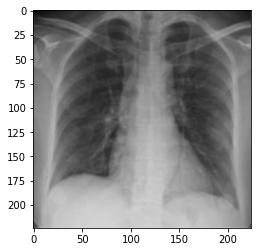

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

## Contrast enhanced by -64

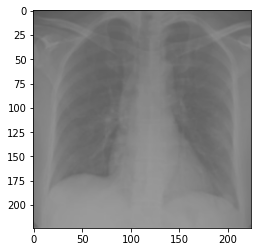

In [ ]:
X_cm64= []
Y_cm64 = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_cm64.append(apply_brightness_contrast(image, 0, -64))
        Y_cm64.append(images_class[label])

plt.imshow(X_cm64[0])
plt.show()

## Contrast enhanced by 64

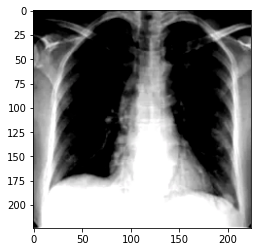

In [ ]:
X_c64 = []
Y_c64 = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_c64.append(apply_brightness_contrast(image, 0, 64))
        Y_c64.append(images_class[label])

plt.imshow(X_c64[0])
plt.show()

## Brightness enhanced by -64

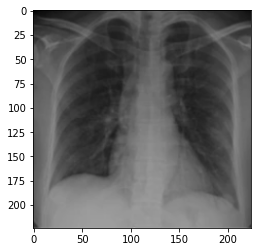

In [ ]:
X_bm64= []
Y_bm64 = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_bm64.append(apply_brightness_contrast(image, -64, 0))
        Y_bm64.append(images_class[label])

plt.imshow(X_bm64[0])
plt.show()

## Brightness enhanced by 64

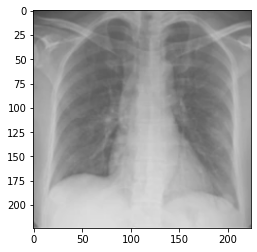

In [ ]:
X_b64= []
Y_b64 = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_b64.append(apply_brightness_contrast(image, 64, 0))
        Y_b64.append(images_class[label])

plt.imshow(X_b64[0])
plt.show()

## Contrast and Brightness enhanced by 64

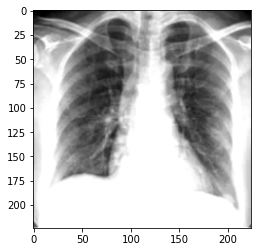

In [ ]:
X_contrast = []
Y_contrast = []

for label in images_path:
    for image_path in images_path_contrast[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_contrast.append(image)
        Y_contrast.append(images_class[label])

plt.imshow(X_contrast[0])
plt.show()

## Magnitude Spectrum

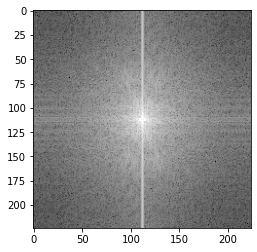

In [ ]:
X_spectrum = []
Y_spectrum = []

for label in images_path:
    for image_path in images_path_spectrum[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_spectrum.append(image)
        Y_spectrum.append(images_class[label])

plt.imshow(X_spectrum[0])
plt.show()

## Binary Threshold Filter

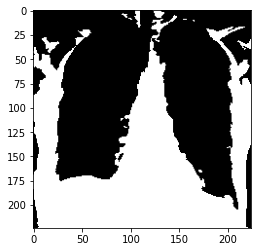

In [ ]:
X_th = []
Y_th = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X_th.append(cv2.threshold(image,127,255,cv2.THRESH_BINARY)[1])
        Y_th.append(images_class[label])

plt.imshow(X_th[0])
plt.show()

# Train-Test Splits

## No Processing

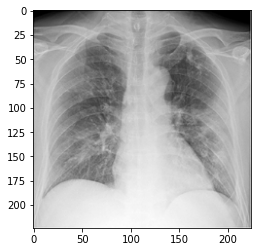

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state=80)
plt.imshow(X_train[15])

##Contrast and Brightness enhanced by 64

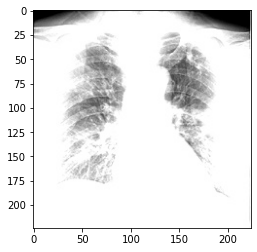

In [ ]:
X_train_contrast, X_test_contrast, Y_train_contrast, Y_test_contrast = train_test_split(np.array(X_contrast), np.array(Y_contrast), test_size=0.2, random_state=80)
plt.imshow(X_train_contrast[15])

##Contrast enhanced by -64

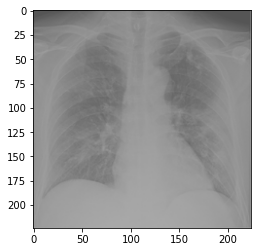

In [ ]:
X_train_cm64, X_test_cm64, Y_train_cm64, Y_test_cm64 = train_test_split(np.array(X_cm64), np.array(Y_cm64), test_size=0.2, random_state=80)
plt.imshow(X_train_cm64[15])

##Contrast enhanced by 64

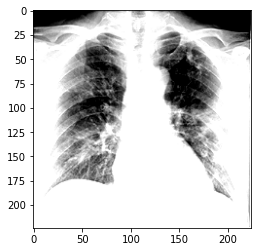

In [ ]:
X_train_c64, X_test_c64, Y_train_c64, Y_test_c64 = train_test_split(np.array(X_c64), np.array(Y_c64), test_size=0.2, random_state=80)
plt.imshow(X_train_c64[15])

##Brightness enhanced by -64

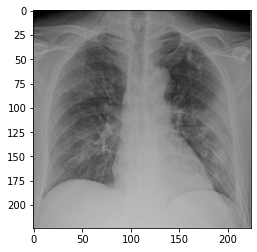

In [ ]:
X_train_bm64, X_test_bm64, Y_train_bm64, Y_test_bm64 = train_test_split(np.array(X_bm64), np.array(Y_bm64), test_size=0.2, random_state=80)
plt.imshow(X_train_bm64[15])

##Brightness enhanced by 64

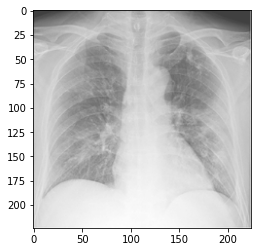

In [ ]:
X_train_b64, X_test_b64, Y_train_b64, Y_test_b64 = train_test_split(np.array(X_b64), np.array(Y_b64), test_size=0.2, random_state=80)
plt.imshow(X_train_b64[15])

##Magnitude Spectrum

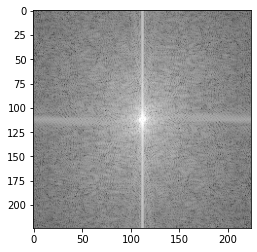

In [ ]:
X_train_spectrum, X_test_spectrum, Y_train_spectrum, Y_test_spectrum = train_test_split(np.array(X_spectrum), np.array(Y_spectrum), test_size=0.2, random_state=80)
plt.imshow(X_train_spectrum[15])

##Binary Threshold Filter

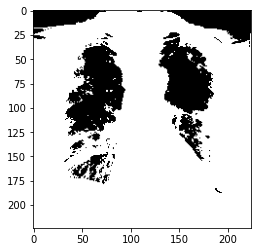

In [ ]:
X_train_th, X_test_th, Y_train_th, Y_test_th = train_test_split(np.array(X_th), np.array(Y_th), test_size=0.2, random_state=80)
plt.imshow(X_train_th[15])

#Features Extraction

In [ ]:
DenseNet169 = DenseNet169(include_top=False, input_shape=(224, 224, 3), pooling="avg")

In [ ]:
X_train = DenseNet169.predict(X_train)
X_test = DenseNet169.predict(X_test)

In [ ]:
X_train_contrast = DenseNet169.predict(X_train_contrast)
X_test_contrast = DenseNet169.predict(X_test_contrast)

In [ ]:
X_train_c64 = DenseNet169.predict(X_train_c64)
X_test_c64  = DenseNet169.predict(X_test_c64)

In [ ]:
X_train_spectrum = DenseNet169.predict(X_train_spectrum )
X_test_spectrum  = DenseNet169.predict(X_test_spectrum )

In [ ]:
X_train_th = DenseNet169.predict(X_train_th)
X_test_th  = DenseNet169.predict(X_test_th)

In [ ]:
X_train_b64 = DenseNet169.predict(X_train_b64)
X_test_b64 = DenseNet169.predict(X_test_b64)

In [ ]:
X_train_bm64 = DenseNet169.predict(X_train_bm64)
X_test_bm64 = DenseNet169.predict(X_test_bm64)

In [ ]:
X_train_cm64 = DenseNet169.predict(X_train_cm64)
X_test_cm64 = DenseNet169.predict(X_test_cm64)

#Predictions

In [ ]:
XGB_Classifier = XGBClassifier(learning_rate=0.44, n_estimators=100, random_state=0, seed=0, gamma=0)

In [ ]:
result = {}

XGB_Classifier.fit(X_train, Y_train)
Y_pred = XGB_Classifier.predict(X_test)
result["No Processing Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_cm64, Y_train_cm64)
Y_pred = XGB_Classifier.predict(X_test_cm64)
result["Contrast -64 Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_c64, Y_train_c64)
Y_pred = XGB_Classifier.predict(X_test_c64)
result["Contrast +64 Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_bm64, Y_train_bm64)
Y_pred = XGB_Classifier.predict(X_test_bm64)
result["Brightness -64 Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_b64, Y_train_b64)
Y_pred = XGB_Classifier.predict(X_test_b64)
result["Brightness +64 Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_contrast, Y_train_contrast)
Y_pred = XGB_Classifier.predict(X_test_contrast)
result["Contrast and Brightness +64 Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_spectrum, Y_train_spectrum)
Y_pred = XGB_Classifier.predict(X_test_spectrum)
result["Magnitude Spectrum Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
XGB_Classifier.fit(X_train_th, Y_train_th)
Y_pred = XGB_Classifier.predict(X_test_th)
result["Binary Threshold Accuracy"] = accuracy_score(Y_test, Y_pred)

In [ ]:
result

{'Binary Threshold Accuracy': 0.7822222222222223,
 'Brightness +64 Accuracy': 0.8177777777777778,
 'Brightness -64 Accuracy': 0.7822222222222223,
 'Contrast +64 Accuracy': 0.7955555555555556,
 'Contrast -64 Accuracy': 0.7866666666666666,
 'Contrast and Brightness +64 Accuracy': 0.7911111111111111,
 'Magnitude Spectrum Accuracy': 0.7333333333333333,
 'No Processing Accuracy': 0.8133333333333334}

#Final Proposed Method

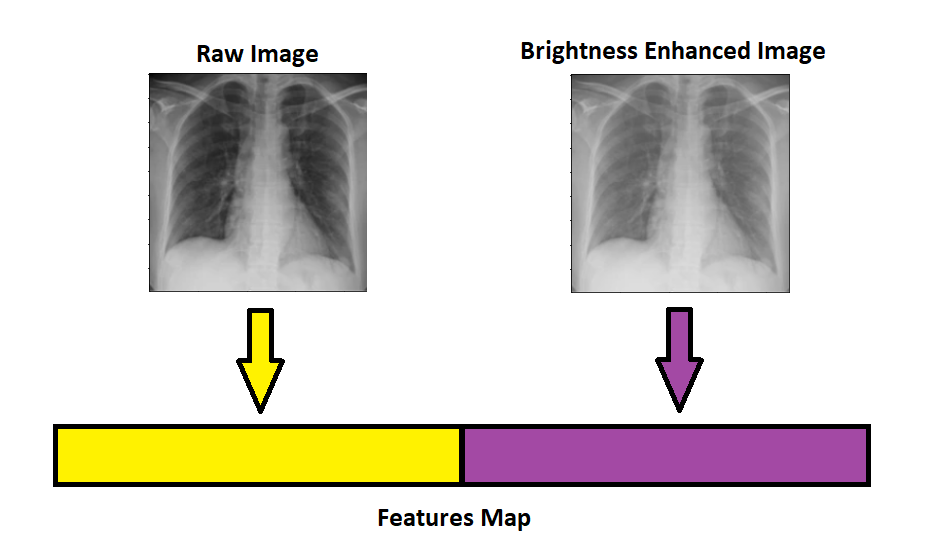

In [ ]:
X_train_general = []
X_test_general = []

for i in range(len(X_train)):
  X_train_general.append(np.concatenate((X_train[i], X_train_b64[i])))
for i in range(len(X_test)):
  X_test_general.append(np.concatenate((X_test[i], X_test_b64[i])))

X_train_general = np.array(X_train_general)
X_test_general = np.array(X_test_general)

XGB_Classifier.fit(X_train_general, Y_train)

Y_pred = XGB_Classifier.predict(X_test_general)

result["Accuracy score"] = accuracy_score(Y_test, Y_pred)
result["confusion matrix"] = confusion_matrix(Y_test, Y_pred)
result["f1 score"] = f1_score(Y_test, Y_pred, average="macro")
result["precision score"] = precision_score(Y_test, Y_pred, average="macro")
result["Sensitivity"] = result["confusion matrix"][0,0] / (result["confusion matrix"][0,0] + result["confusion matrix"][0,1])
result["Specifity"] = result["confusion matrix"][1,1] / (result["confusion matrix"][1,0] + result["confusion matrix"][1,1])

print(f"\n============")
print(f"\nAccuracy score : ", result["Accuracy score"])
print(f"\nconfusion matrix : \n", result["confusion matrix"])
print(f"\nf1 score : ", result["f1 score"])
print(f"\nprecision score : ", result["precision score"])
print(f"\nSpecifity : ", result["Specifity"])
print(f"\nSensitivity : ", result["Sensitivity"])



Accuracy score :  0.8311111111111111

confusion matrix : 
 [[21  0  1]
 [ 1 77 25]
 [ 0 11 89]]

f1 score :  0.8629117179342431

precision score :  0.8678194993412385

Specifity :  0.9871794871794872

Sensitivity :  1.0
